In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv('bank_transactions.csv')
dt = data.copy()
df = dt.sample(100000)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
618856,T618857,C6414213,19/9/79,F,GURGAON,176664.60,25/8/16,153327,243.00
42973,T42974,C9017682,25/10/85,F,GURGAON,56084.55,3/8/16,81353,184.00
481941,T481942,C6980437,2/3/72,F,MUMBAI,58138.37,20/8/16,3035,1705.00
963580,T963581,C4035749,1/6/91,M,PANIPAT,1199.86,10/9/16,135238,59.00
591788,T591789,C1135128,31/1/93,M,NOIDA,947.03,27/8/16,214304,700.00
...,...,...,...,...,...,...,...,...,...
609632,T609633,C7536113,6/4/54,F,THANE,93530.91,25/8/16,122520,1376.07
257446,T257447,C8431585,8/11/85,M,CHENNAI,127653.81,12/8/16,145304,480.00
435045,T435046,C2532584,13/7/94,M,NEW DELHI,35420.79,17/8/16,230257,700.00
1023783,T1023784,C5117224,1/11/88,M,PANJIM,1303.74,13/9/16,183336,300.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 618856 to 428150
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99673 non-null   object 
 3   CustGender               99885 non-null   object 
 4   CustLocation             99986 non-null   object 
 5   CustAccountBalance       99789 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [5]:
df.isna().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                327
CustGender                 115
CustLocation                14
CustAccountBalance         211
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [6]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,9.978900e+04,100000.000000,100000.000000
mean,1.193045e+05,157087.801350,1588.185399
std,9.653693e+05,51117.464864,6790.186091
min,0.000000e+00,0.000000,0.000000
25%,4.771200e+03,124036.000000,160.000000
50%,1.691922e+04,164022.500000,460.000000
75%,5.765516e+04,200030.000000,1200.000000
max,1.150355e+08,235959.000000,991132.220000


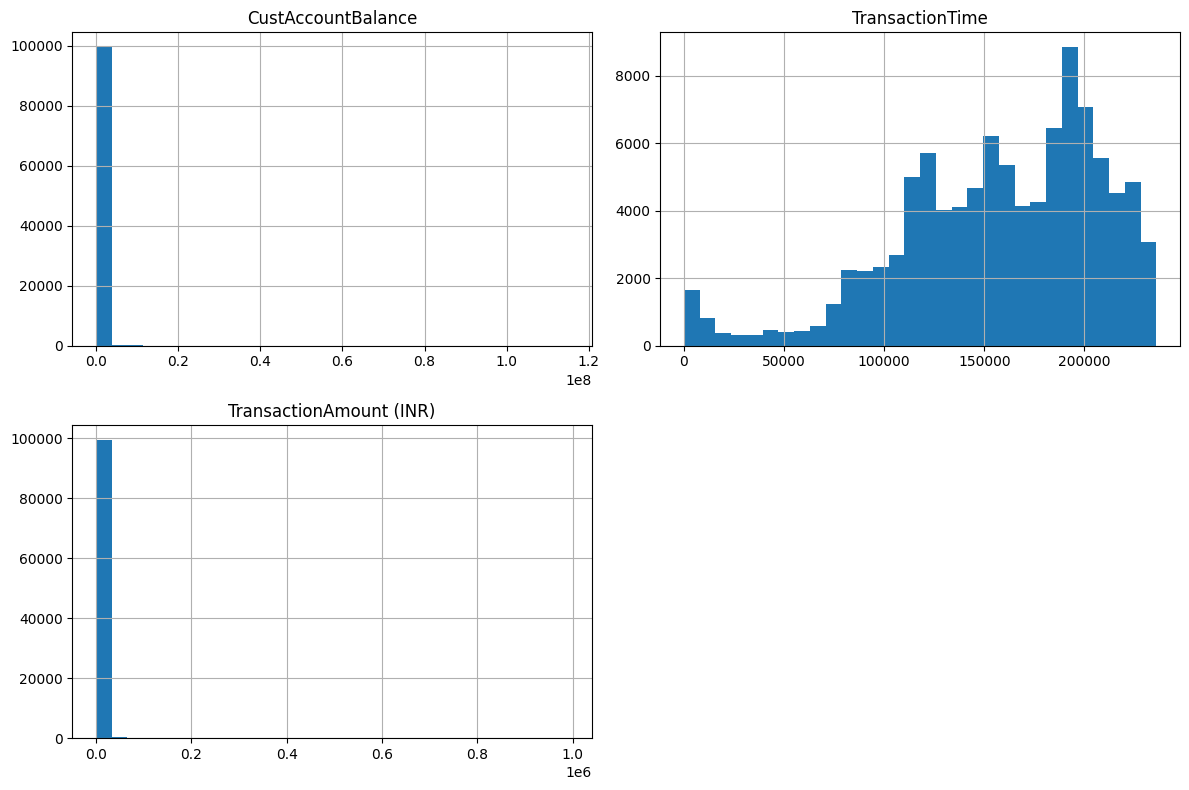

In [7]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

In [8]:
df = df.dropna(subset=['CustAccountBalance'])

In [9]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['Age'] = 2025 - df['CustomerDOB'].dt.year
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['CustomerDOB'],inplace=True)
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
618856,T618857,C6414213,F,GURGAON,176664.60,25/8/16,153327,243.0,46.0
42973,T42974,C9017682,F,GURGAON,56084.55,3/8/16,81353,184.0,40.0
481941,T481942,C6980437,F,MUMBAI,58138.37,20/8/16,3035,1705.0,-47.0
963580,T963581,C4035749,M,PANIPAT,1199.86,10/9/16,135238,59.0,34.0
591788,T591789,C1135128,M,NOIDA,947.03,27/8/16,214304,700.0,32.0


In [10]:
df['CustGender'].fillna(df['CustGender'].mode()[0], inplace=True)
df['CustLocation'].fillna(df['CustLocation'].mode()[0],inplace=True)

In [11]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [12]:
df['TransactionDate']= pd.to_datetime(df['TransactionDate'],errors='coerce')
df['TransactionYear']= df['TransactionDate'].dt.year
df['TransactionMonth']= df['TransactionDate'].dt.month
df['TransactionDay']= df['TransactionDate'].dt.day

In [13]:
df['TransactionHours']= df['TransactionTime'] // 10000

In [14]:
df.drop(columns = ['TransactionDate','TransactionTime'], inplace=True )
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
618856,T618857,C6414213,F,GURGAON,176664.60,243.0,46.0,2016,8,25,15
42973,T42974,C9017682,F,GURGAON,56084.55,184.0,40.0,2016,3,8,8
481941,T481942,C6980437,F,MUMBAI,58138.37,1705.0,-47.0,2016,8,20,0
963580,T963581,C4035749,M,PANIPAT,1199.86,59.0,34.0,2016,10,9,13
591788,T591789,C1135128,M,NOIDA,947.03,700.0,32.0,2016,8,27,21


In [15]:
lb = LabelEncoder()
df['CustGender']=lb.fit_transform(df['CustGender'])
df['CustLocation']=lb.fit_transform(df['CustLocation'])
df['TransactionID']=lb.fit_transform(df['TransactionID'])
df['CustomerID']=lb.fit_transform(df['CustomerID'])

In [16]:
df

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
618856,59696,65200,0,1431,176664.60,243.00,46.0,2016,8,25,15
42973,39524,97079,0,1431,56084.55,184.00,40.0,2016,3,8,8
481941,45103,72355,0,2458,58138.37,1705.00,-47.0,2016,8,20,0
963580,95887,37100,1,2900,1199.86,59.00,34.0,2016,10,9,13
591788,56805,1996,1,2735,947.03,700.00,32.0,2016,8,27,21
...,...,...,...,...,...,...,...,...,...,...,...
609632,58675,79330,0,3875,93530.91,1376.07,-29.0,2016,8,25,12
257446,21270,90242,1,753,127653.81,480.00,40.0,2016,12,8,14
435045,40091,18833,1,2694,35420.79,700.00,31.0,2016,8,17,23
1023783,2472,49669,1,2901,1303.74,300.00,37.0,2016,9,13,18


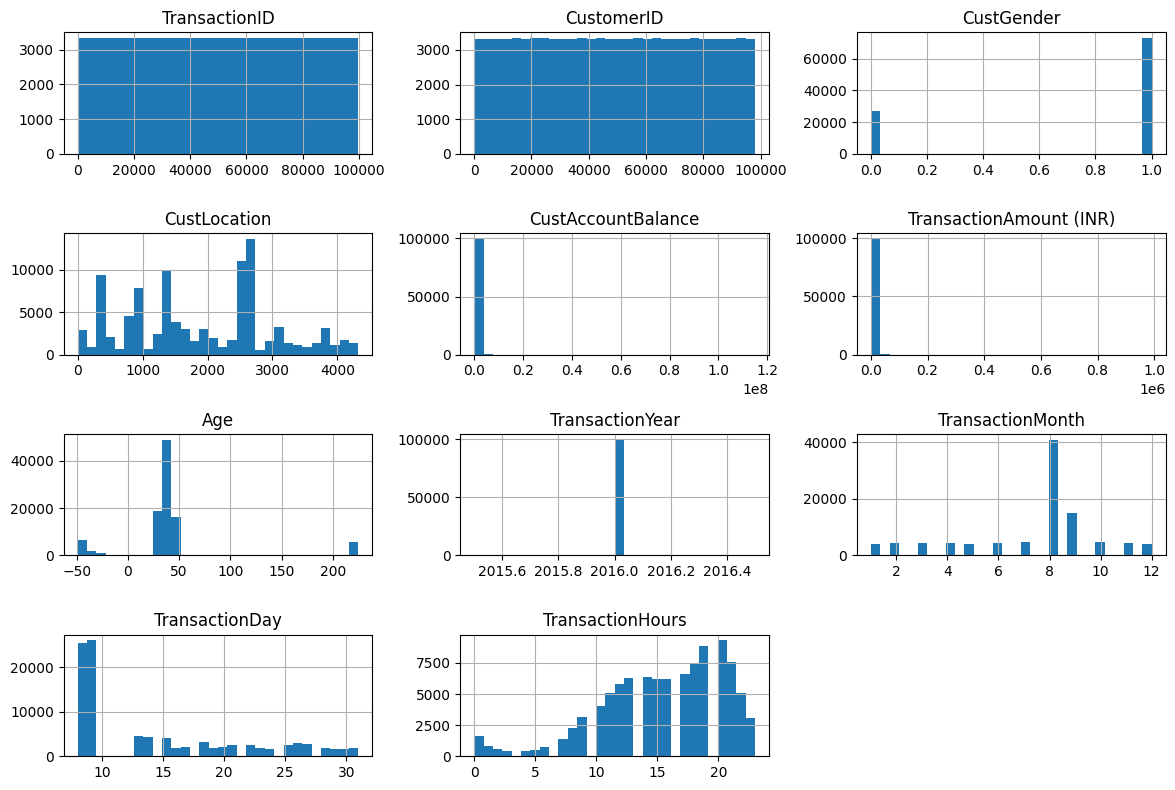

In [17]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

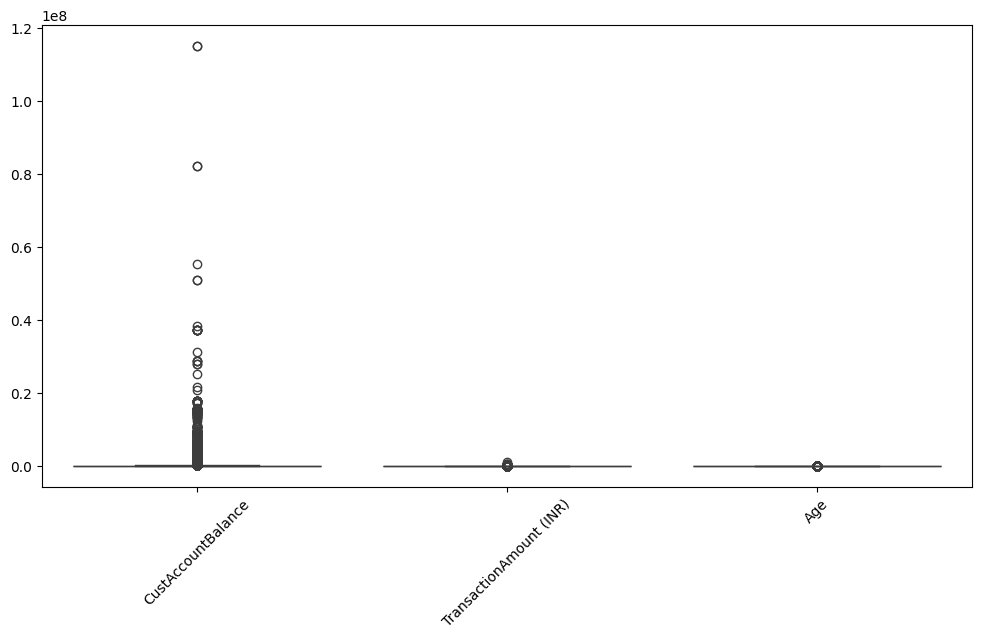

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['CustAccountBalance','TransactionAmount (INR)','Age']])
plt.xticks(rotation=45)
plt.show()

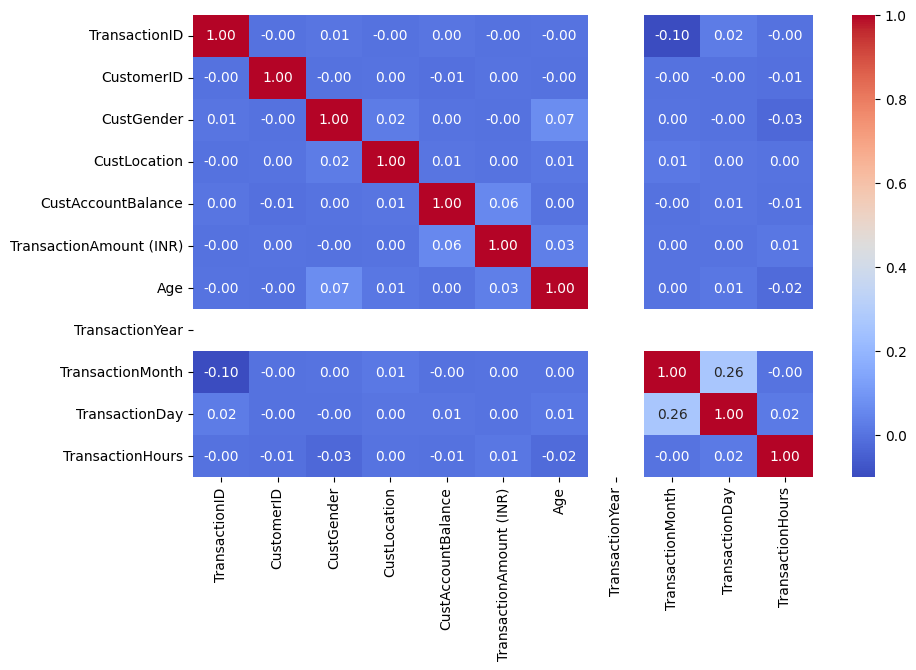

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


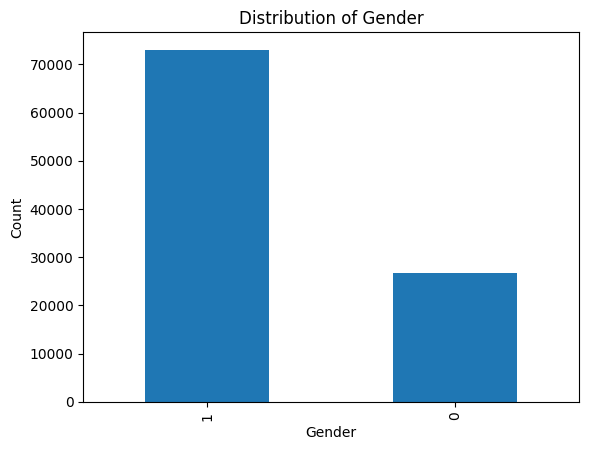

In [20]:
df['CustGender'].value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [21]:
fet=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','Age','TransactionYear','TransactionMonth',
     'TransactionDay','TransactionHours']
scl=StandardScaler()
df_scl = scl.fit_transform(df[fet])
df_scl = pd.DataFrame(df_scl,columns=fet)
df_scl.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
0,-1.651263,-0.437323,0.059418,-0.198279,0.116105,0.0,0.245967,1.449953,-0.080582
1,-1.651263,-0.437323,-0.065488,-0.206989,-0.001976,0.0,-1.658413,-0.883246,-1.449626
2,-1.651263,0.495212,-0.063361,0.017556,-1.714156,0.0,0.245967,0.763718,-3.014248
3,0.605597,0.896557,-0.122342,-0.225443,-0.120058,0.0,1.007719,-0.745999,-0.471737
4,0.605597,0.746734,-0.122604,-0.130812,-0.159418,0.0,0.245967,1.724448,1.092885


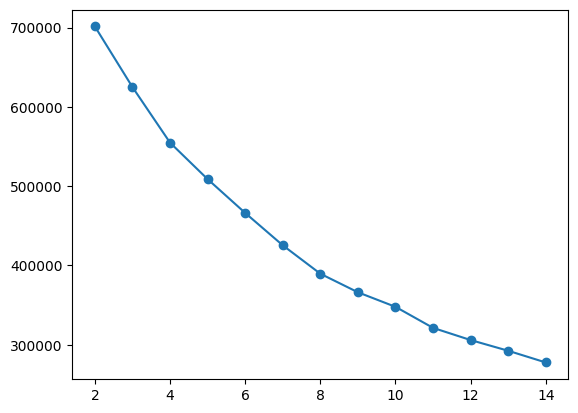

In [22]:
exp=[]
k = range(2,15)
for i in k:
    kmeans= KMeans(n_clusters = i, random_state= 42, n_init=10)
    kmeans.fit(df_scl)
    exp.append(kmeans.inertia_)
plt.plot(k,exp, marker='o',linestyle='-')
plt.show()

In [23]:
opt_k = 4
kmeans=KMeans(n_clusters=opt_k,random_state=42,init="k-means++")
df['Cluster']=kmeans.fit_predict(df_scl)
df[['CustAccountBalance','TransactionAmount (INR)','Age','Cluster']].head()

,CustAccountBalance,TransactionAmount (INR),Age,Cluster
618856,176664.60,243.0,46.0,3
42973,56084.55,184.0,40.0,1
481941,58138.37,1705.0,-47.0,3
963580,1199.86,59.0,34.0,0
591788,947.03,700.0,32.0,3


In [24]:
df.dtypes

TransactionID                int64
CustomerID                   int64
CustGender                   int64
CustLocation                 int64
CustAccountBalance         float64
TransactionAmount (INR)    float64
Age                        float64
TransactionYear              int32
TransactionMonth             int32
TransactionDay               int32
TransactionHours             int64
Cluster                      int32
dtype: object

In [25]:
df['TransactionAmount (INR)'] = pd.to_numeric(df['TransactionAmount (INR)'], errors='coerce')
df['CustAccountBalance'] = pd.to_numeric(df['CustAccountBalance'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [26]:
df.groupby("Cluster").mean()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
Cluster,,,,,,,,,,,
0,48077.129234,48932.948580,0.727042,1920.482939,94499.136637,1440.216787,29.383851,2016.0,9.041206,10.834804,15.184606
1,53509.441521,49314.265673,0.725944,1888.495994,96819.306351,1422.740925,29.751879,2016.0,3.525770,8.515157,15.480838
2,49716.185392,48615.383228,0.868350,1964.811722,454049.535913,4172.294151,223.693778,2016.0,7.413886,15.004869,14.747881
3,49442.454671,49061.868593,0.717115,1911.904944,108778.103184,1434.499536,28.814419,2016.0,8.176249,24.003994,15.786829


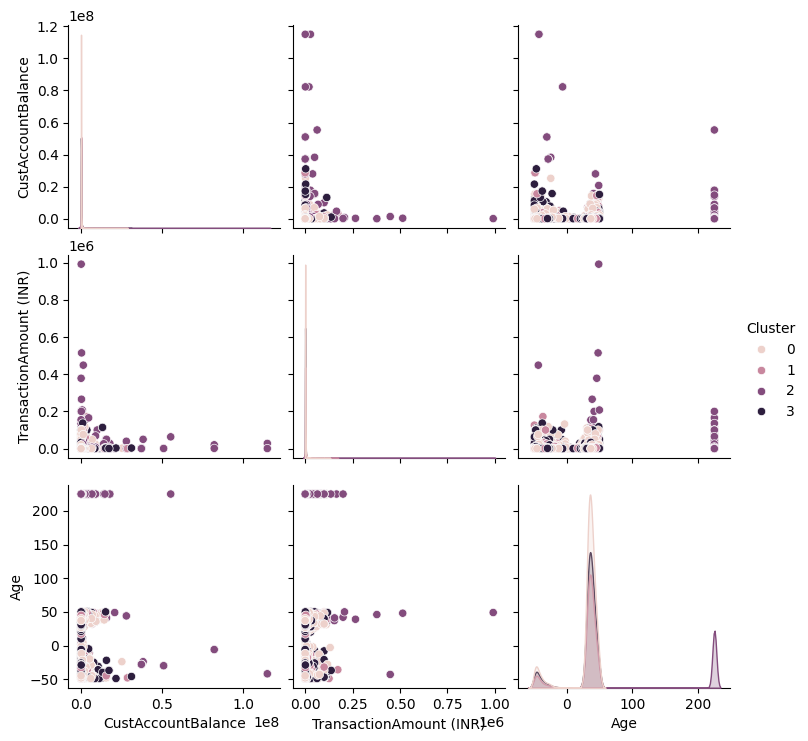

In [27]:
sns.pairplot(df,hue="Cluster", vars=['CustAccountBalance','TransactionAmount (INR)','Age'])
plt.show()